In [2]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score









In [3]:
# Loading the dataset
file_path = 'cleaned_green_tripdata_2025_03.csv'
df = pd.read_csv(file_path, encoding='ascii')

C:\Users\Dell\AppData\Local\Temp\ipykernel_11548\1866842288.py:3: DtypeWarning: Columns (2,5,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='ascii')


In [4]:




# Displaying the first few rows of the dataframe
print(df.head())

   VendorID store_and_fwd_flag RatecodeID  PULocationID  DOLocationID  \
0         2                  N          1            75           239   
1         2                  N          1            41            42   
2         2                  N          1            66            33   
3         2                  N          1           134           122   
4         2                  N          1           260           260   

  passenger_count  trip_distance  fare_amount  extra  mta_tax  ...  \
0               1           2.20         18.4    1.0      0.5  ...   
1               1           1.06          8.6    1.0      0.5  ...   
2               1           0.82          5.8    1.0      0.5  ...   
3               1           4.94         21.9    1.0      0.5  ...   
4               1           0.81          8.6    1.0      0.5  ...   

   payment_type  trip_type  congestion_surcharge  cbd_congestion_fee  \
0             1          1                  2.75                 0.0

In [5]:
# Selecting relevant features and target variable
features = ['trip_distance', 'pickup_hour', 'is_weekend', 'is_rush_hour']
target = 'trip_duration'

In [6]:
# Preparing the feature matrix and target vector
X = df[features]
Y = df[target]

In [7]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
# Displaying the shapes of the training and testing sets
print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

Training set shape: (33392, 4)
Testing set shape: (8348, 4)


In [9]:
# Initializing the Linear Regression model
model = LinearRegression()



In [10]:
# Training the model on the training data
model.fit(X_train, Y_train)



LinearRegression()

In [11]:
# Making predictions on the test set
Y_pred = model.predict(X_test)



In [12]:
# Evaluating the model's performance
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)



In [13]:
# Displaying the evaluation metrics
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 78110.11368697614
R-squared: 0.42731394350803753


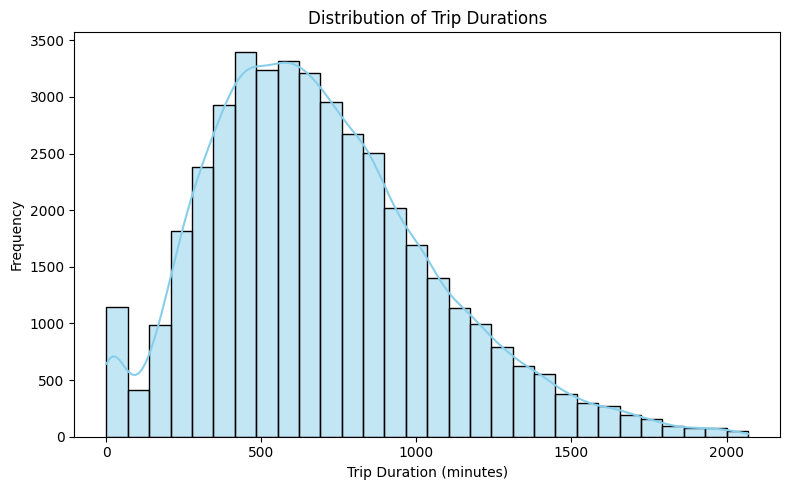

In [14]:
# 1. Trip Duration Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['trip_duration'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Trip Durations")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

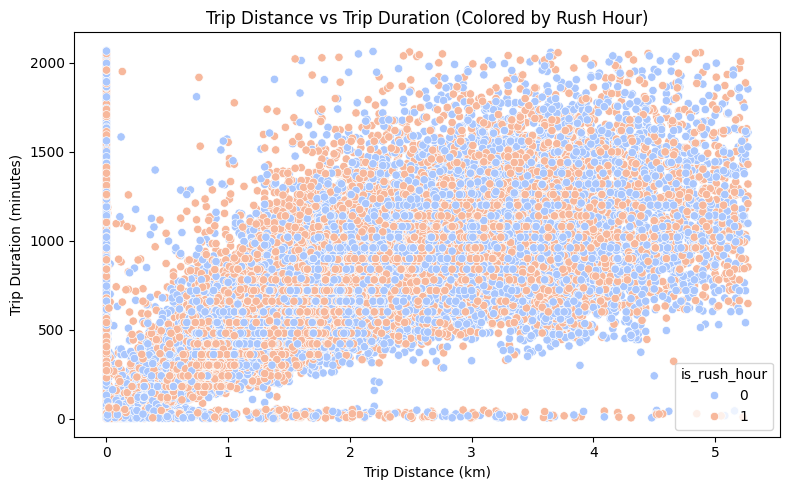

In [15]:
# 2. Trip Distance vs Trip Duration Scatter
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='trip_distance', y='trip_duration', hue='is_rush_hour', palette='coolwarm')
plt.title("Trip Distance vs Trip Duration (Colored by Rush Hour)")
plt.xlabel("Trip Distance (km)")
plt.ylabel("Trip Duration (minutes)")
plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_11548\2746282741.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_duration_by_hour, x='pickup_hour', y='trip_duration', palette="viridis")


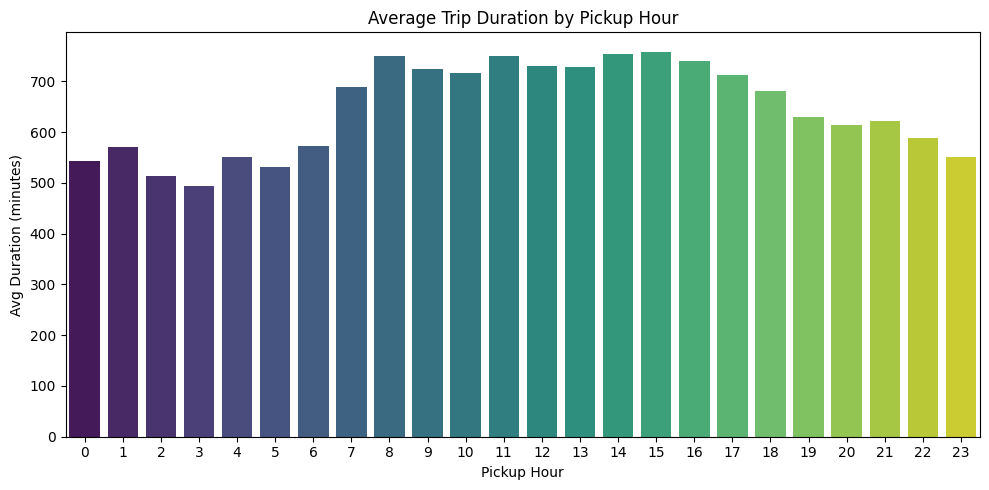

In [16]:
# 3. Average Trip Duration by Pickup Hour
avg_duration_by_hour = df.groupby('pickup_hour')['trip_duration'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=avg_duration_by_hour, x='pickup_hour', y='trip_duration', palette="viridis")
plt.title("Average Trip Duration by Pickup Hour")
plt.xlabel("Pickup Hour")
plt.ylabel("Avg Duration (minutes)")
plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_11548\1525274426.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_weekend', y='trip_duration', palette='pastel')


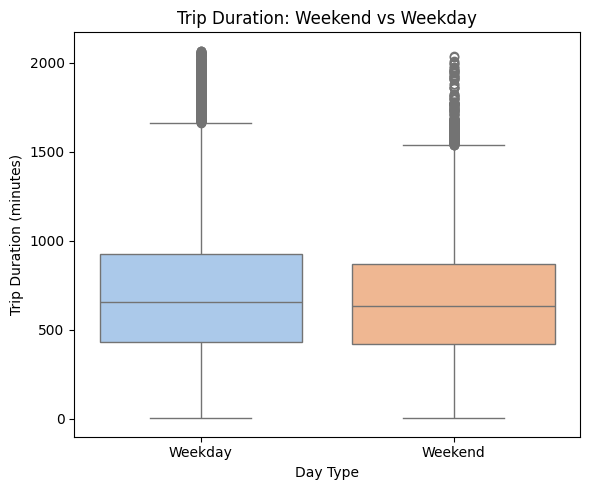

In [17]:
# 4. Weekend vs Weekday Trip Duration Boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='is_weekend', y='trip_duration', palette='pastel')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.title("Trip Duration: Weekend vs Weekday")
plt.xlabel("Day Type")
plt.ylabel("Trip Duration (minutes)")
plt.tight_layout()
plt.show()